In [24]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
from scipy.signal import savgol_filter
from scipy.stats import mannwhitneyu


In [7]:
from shephard import interfaces
from shephard.apis import fasta

### Figure 1
This notebook contains the code needed to generate the data figures in Figure 1 of Langstein et al.

Dependences are:

1. metapredict ([documentation here](https://metapredict.readthedocs.io/))
2. shephard ([documentation here](https://shephard.readthedocs.io/))


These can be installed via

    pip install metapredict

and

    pip install shephard@git+git://github.com/holehouse-lab/shephard.git


<hr>
    

In [8]:
yeast_proteome = fasta.fasta_to_proteome('data/yeast_sequence_dataset.fasta',use_header_as_unique_ID=True)

In [9]:
interfaces.si_tracks.add_tracks_from_file(yeast_proteome,'data/conservation_scores_SHPRD.tsv', mode='values')
interfaces.si_tracks.add_tracks_from_file(yeast_proteome,'data/pLDDT_scores_SHPRD.tsv', mode='values')
interfaces.si_tracks.add_tracks_from_file(yeast_proteome,'data/disorder_scores_SHPRD.tsv', mode='values')
interfaces.si_domains.add_domains_from_file(yeast_proteome,'data/idrs_shephard.tsv')

interfaces.si_protein_attributes.add_protein_attributes_from_file(yeast_proteome,'data/number_of_orthologs_SHPRD.tsv')
interfaces.si_protein_attributes.add_protein_attributes_from_file(yeast_proteome,'data/essential_proteins_SHPRD.tsv')



### Example protein
The cell below shows an example protein used as the inset in Figure 1

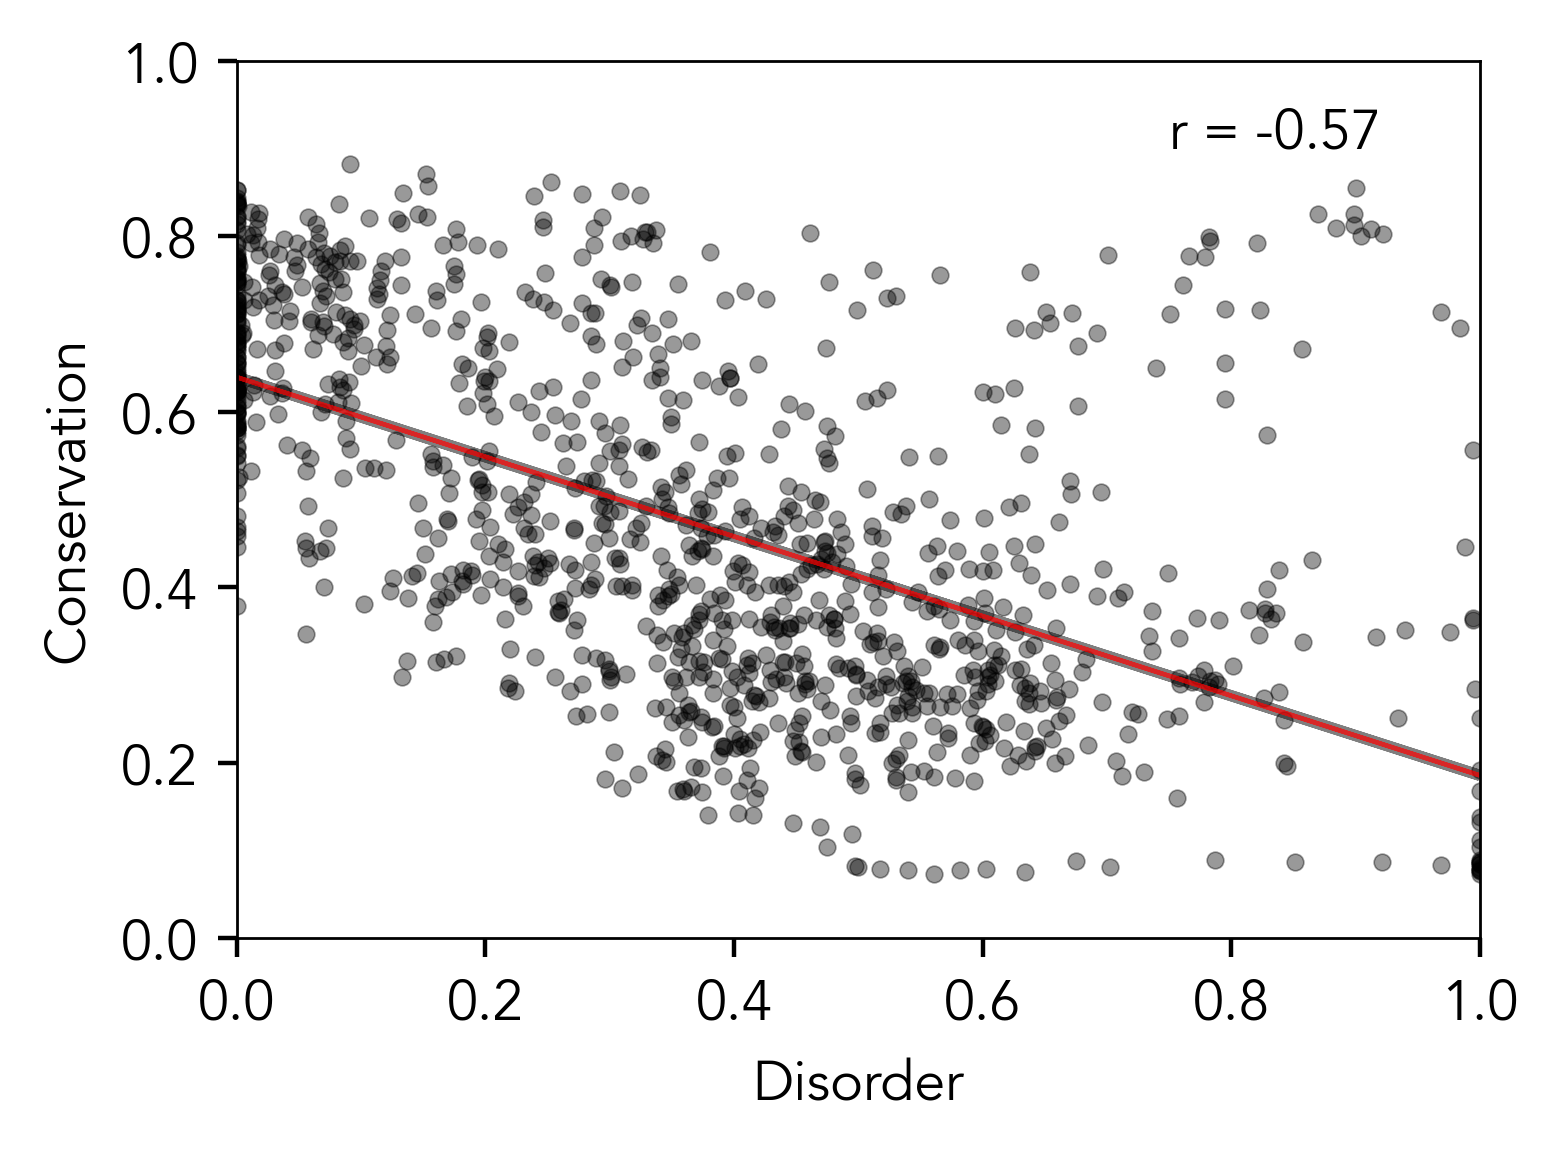

In [10]:
example = 'YER111C_Scerevisiae_YER111C'
figure(num=None, figsize=(4, 3), dpi=200, facecolor='w', edgecolor='k')
protein = yeast_proteome.protein(example)
plt.plot(protein.track('disorder').values, protein.track('conservation').values,'o',
         markeredgecolor='k',
         markeredgewidth=0.3,
         markersize=3,
         markerfacecolor='k',
         alpha=0.4)

f = np.polyfit(protein.track('disorder').values, protein.track('conservation').values,1)
plt.plot(protein.track('disorder').values, np.array(protein.track('disorder').values)*f[0]+f[1],'-k',linewidth=2, alpha=0.5)
plt.plot(protein.track('disorder').values, np.array(protein.track('disorder').values)*f[0]+f[1],'-r',linewidth=0.8, alpha=0.7)

plt.text(0.75, 0.9, 'r = %1.2f'%(np.corrcoef(protein.track('disorder').values, protein.track('conservation').values)[0][1]))
plt.xlabel('Disorder')
plt.ylabel('Conservation')
plt.xlim([0,1])
plt.ylim([0,1])
plt.tight_layout()
plt.savefig('figures/disorder_vs_conservation_example.pdf')

In [11]:
cc = []
cc_pLDDT = []
names = []
for protein in yeast_proteome:
    if int(protein.attribute('ortholog_count')) > 10:        
        names.append(protein.name)
        cc.append(np.corrcoef(protein.track('disorder').values, protein.track('conservation').values)[0][1])
        cc_pLDDT.append(np.corrcoef(protein.track('pLDDT').values, protein.track('conservation').values)[0][1])

-0.4413900388629273


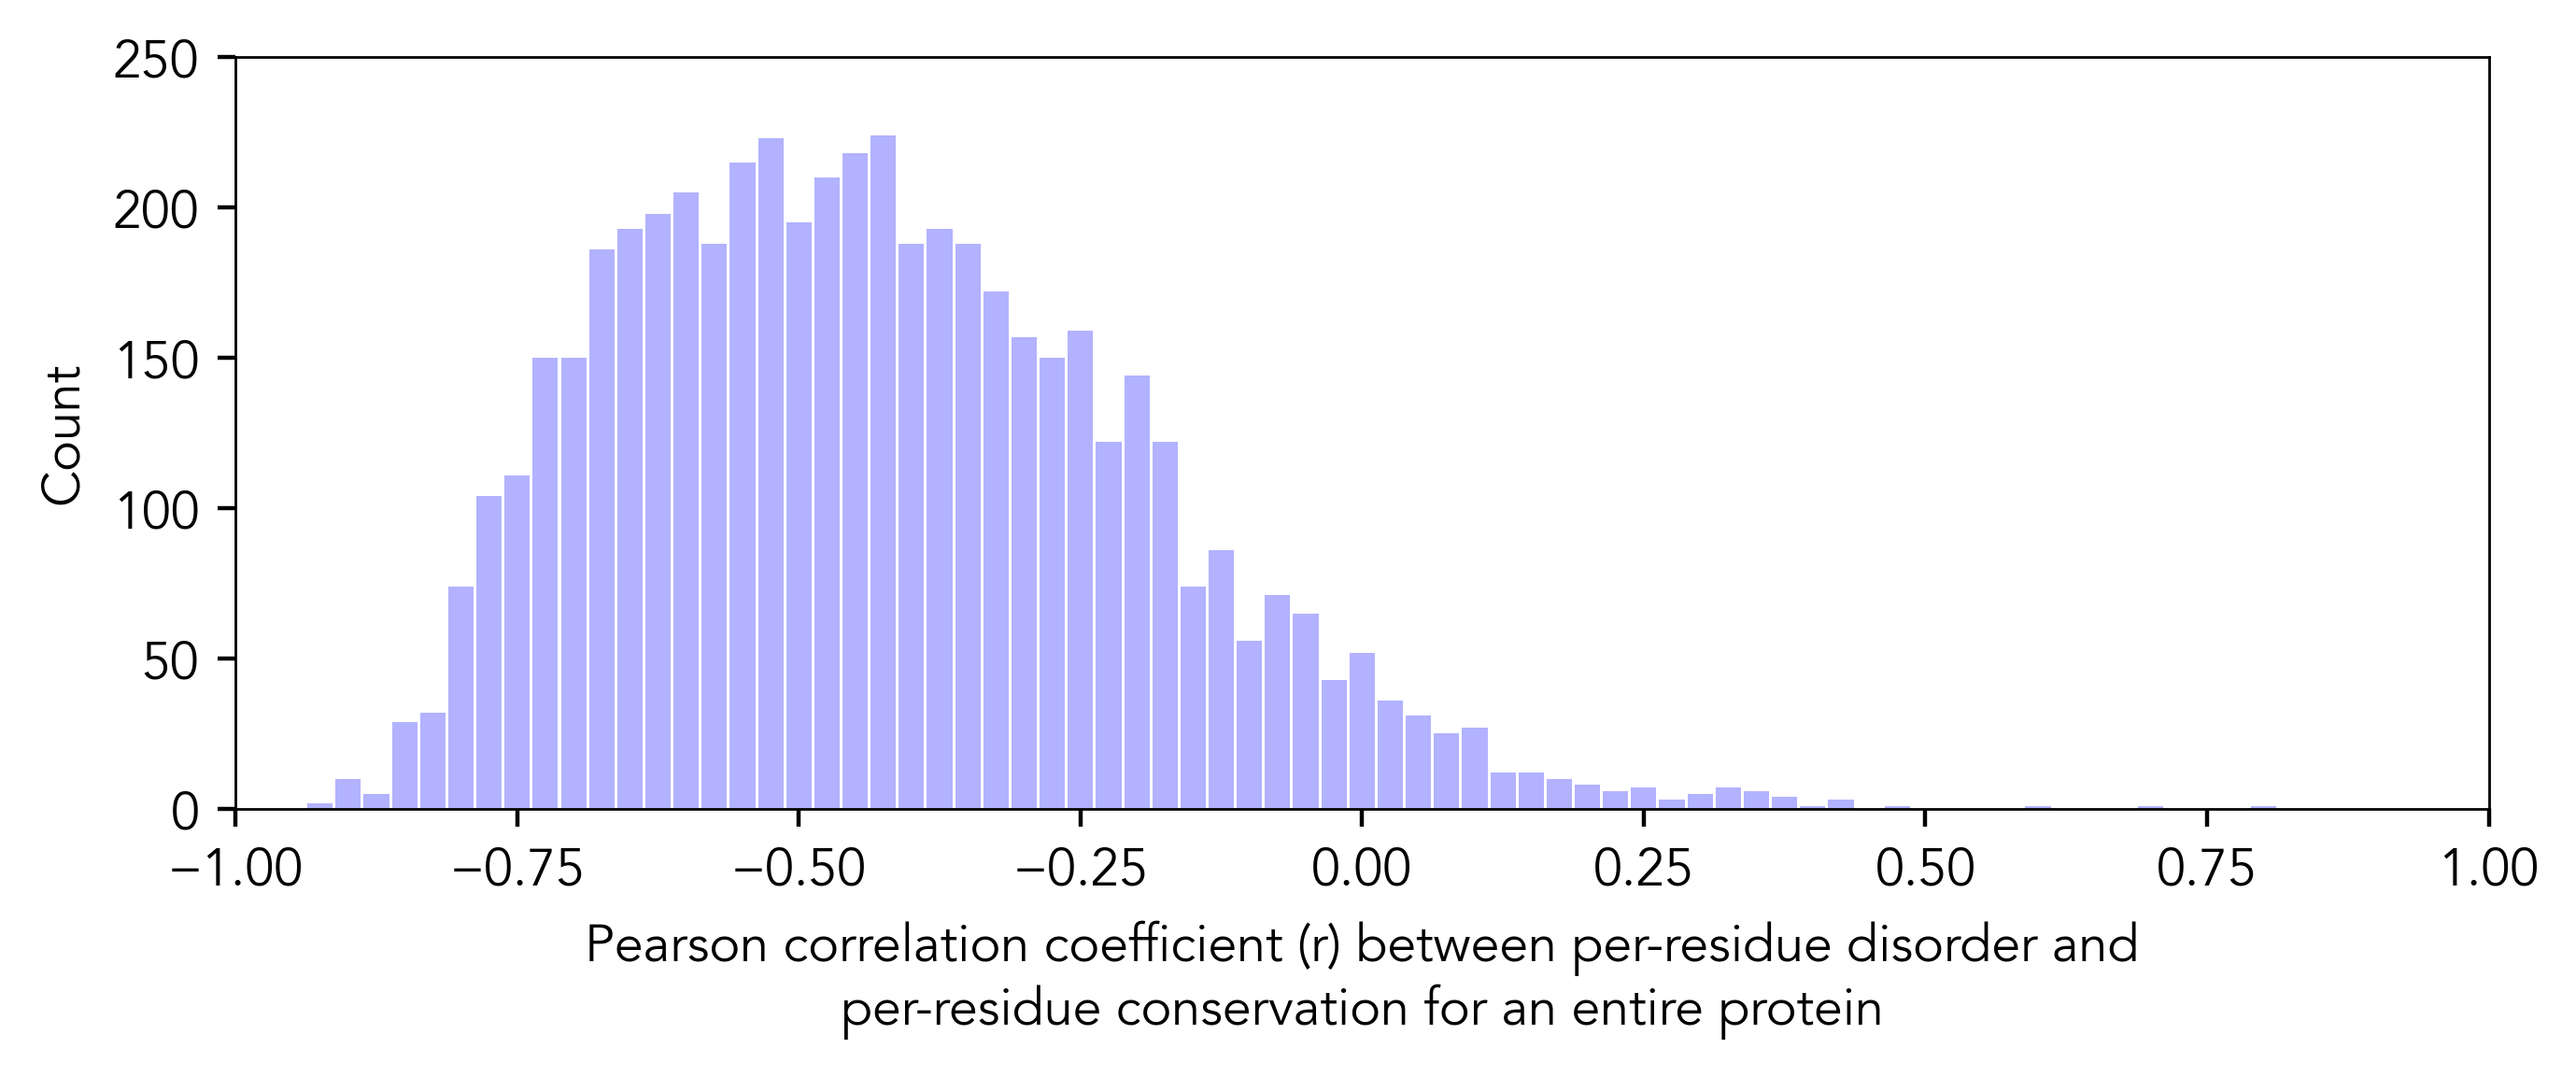

In [12]:
binsize=0.025
bins = np.arange(-1,1+binsize,binsize)
[counts,b] = np.histogram(cc, bins)

actual_bins = b[:-1]+binsize

figure(num=None, figsize=(7, 3), dpi=200, facecolor='w', edgecolor='k')
plt.bar(actual_bins, counts, width=(bins[1]-bins[0])*0.9, color='blue', alpha=0.3)

plt.plot([0,0],[0,0.1],'--k')
plt.xlim([-1,1])
plt.ylim([0,250])
plt.xlabel('Pearson correlation coefficient (r) between per-residue disorder and\nper-residue conservation for an entire protein')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('figures/disorder_vs_conservation_all.pdf')
print(np.mean(cc))

### Correlation between predicted pLDDT and conservation

0.5031040176208273


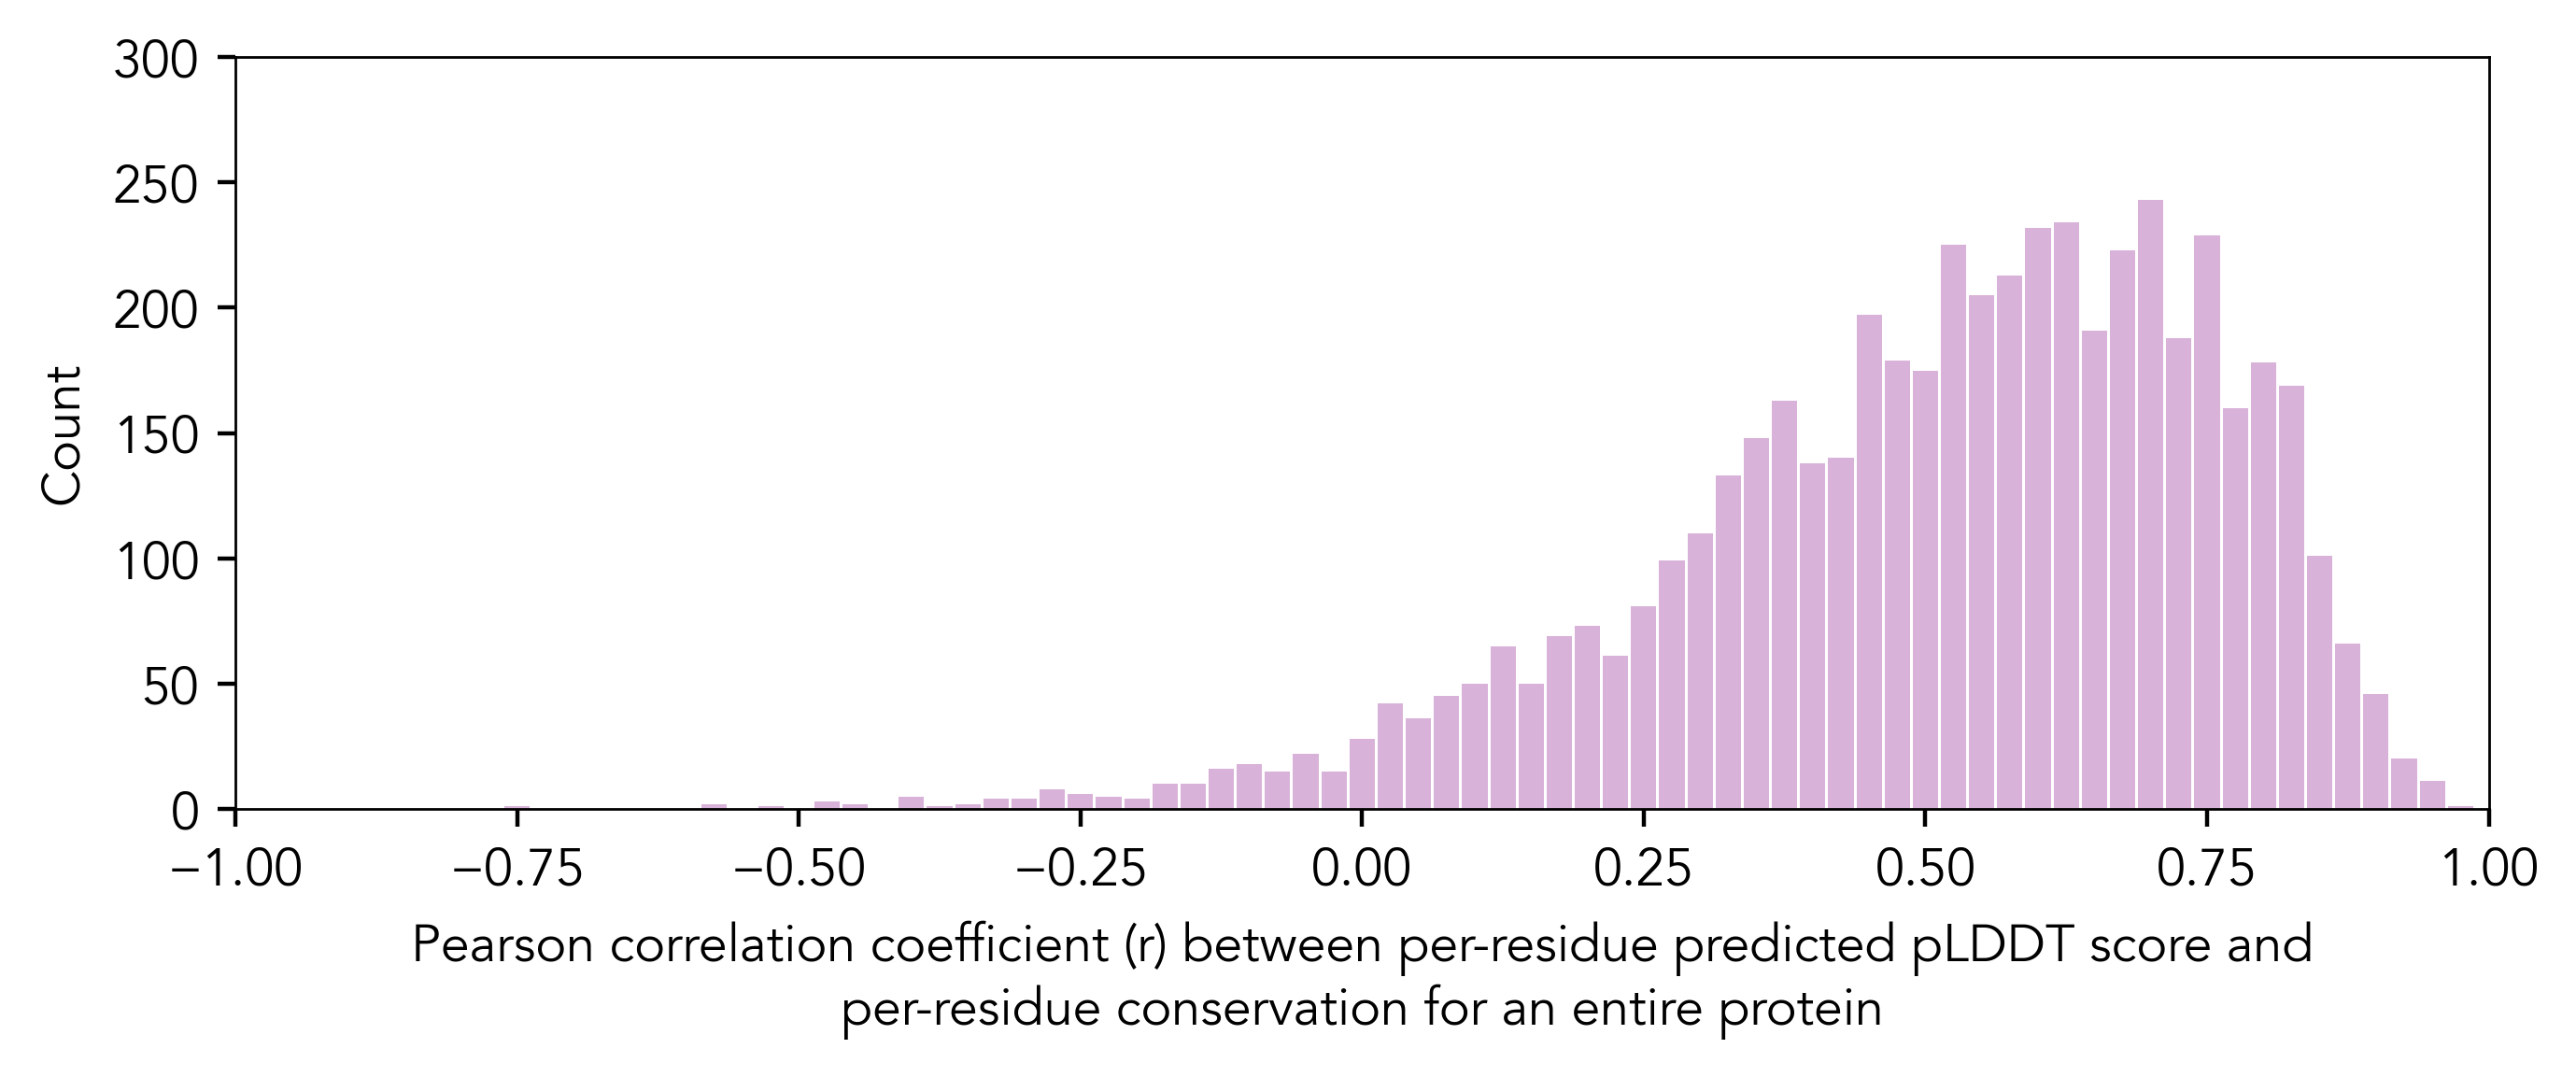

In [13]:
binsize=0.025
bins = np.arange(-1,1+binsize,binsize)
[counts,b] = np.histogram(cc_pLDDT, bins)

actual_bins = b[:-1]+binsize

#yhat = savgol_filter(y, 51, 3)

figure(num=None, figsize=(7, 3), dpi=200, facecolor='w', edgecolor='k')

plt.bar(actual_bins, counts, width=(bins[1]-bins[0])*0.9, color='purple', alpha=0.3)
#plt.plot(bins, x_null[1], color='black', alpha=0.8)
plt.plot([0,0],[0,0.1],'--k')
plt.xlim([-1,1])
plt.ylim([0,300])
plt.xlabel('Pearson correlation coefficient (r) between per-residue predicted pLDDT score and\nper-residue conservation for an entire protein')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('figures/pLDDT_vs_conservation_all.pdf')
print(np.mean(cc_pLDDT))


### Plot conservation for Abf1
The plot below is he disorder profile used in Fig. 1D

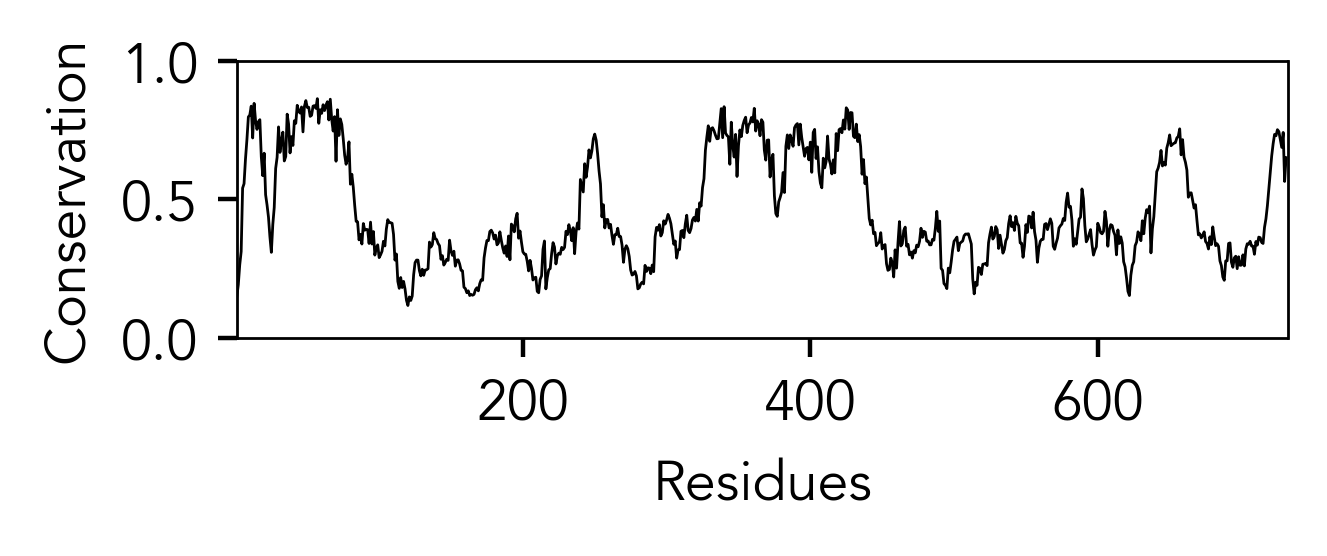

In [14]:
abf1 = yeast_proteome.protein('YKL112W_Scerevisiae_YKL112W')

residue_idx = np.arange(1, len(abf1)+1)

figure(num=None, figsize=(3.5, 1.5), dpi=200, facecolor='w', edgecolor='k')

plt.plot(residue_idx, abf1.track('conservation').values, 'k',linewidth=0.5)
plt.ylim([0,1])
plt.xlim([1,len(abf1)+1])
plt.xlabel('Residues')
plt.ylabel('Conservation')

plt.tight_layout()
plt.savefig('figures/abf1_conservation_profile.pdf')


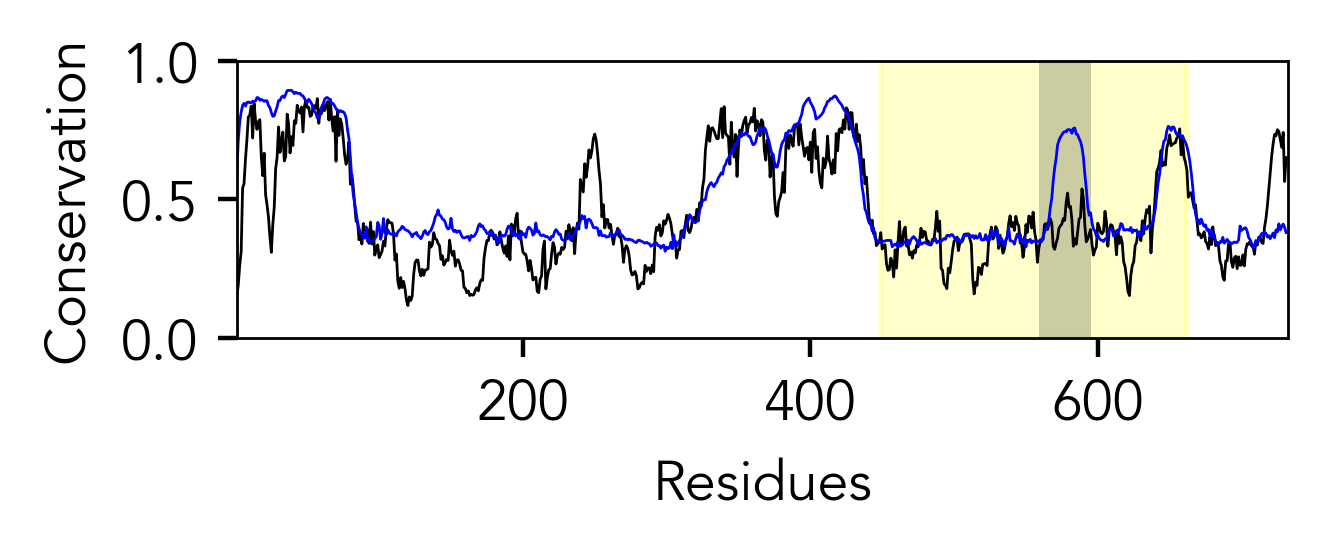

In [15]:
abf1 = yeast_proteome.protein('YKL112W_Scerevisiae_YKL112W')

residue_idx = np.arange(1, len(abf1)+1)

figure(num=None, figsize=(3.5, 1.5), dpi=200, facecolor='w', edgecolor='k')
ax = plt.gca()

plt.plot(residue_idx, abf1.track('conservation').values, 'k',linewidth=0.5)
#plt.plot(residue_idx, abf1.track('disorder').values, 'r',linewidth=0.5)
plt.plot(residue_idx, 0.01*np.array(abf1.track('pLDDT').values), 'b',linewidth=0.5)
plt.ylim([0,1])
plt.xlim([1,len(abf1)+1])
plt.xlabel('Residues')
plt.ylabel('Conservation')
ax.axvspan(449,662,color='yellow',alpha=0.20)
ax.axvspan(559,595,color='black',alpha=0.20,linewidth=0)
#plt.plot([1,600],[0.65,0.65],'--k')

plt.tight_layout()
plt.savefig('figures/abf1_conservation_pLDDT.pdf')


### Plot mean conservation, disorder, and structure in essential vs. all

In [16]:

mean_disorder_non_essential = []
mean_conservation_non_essential = []
mean_pLDDT_non_essential = []

mean_disorder_essential = []
mean_conservation_essential = []
mean_pLDDT_essential = []

for protein in yeast_proteome:
    
    if int(protein.attribute('ortholog_count')) > 10:        

        if 'essential_protein' in protein.attributes:
            mean_disorder_essential.append(np.mean(protein.track('disorder').values))
            mean_conservation_essential.append(np.mean(protein.track('conservation').values))
            mean_pLDDT_essential.append(np.mean(protein.track('pLDDT').values))
        else:
            mean_disorder_non_essential.append(np.mean(protein.track('disorder').values))
            mean_conservation_non_essential.append(np.mean(protein.track('conservation').values))
            mean_pLDDT_non_essential.append(np.mean(protein.track('pLDDT').values))
        
        

1182

Comparing 1182 essential genes vs. 3989 non-essential genes
Mann–Whitney U statistic: 2339372.0
p-value: 0.6876100948560883
Interpretation: No significant evidence that the two groups differ in their distributions of mean disorder.


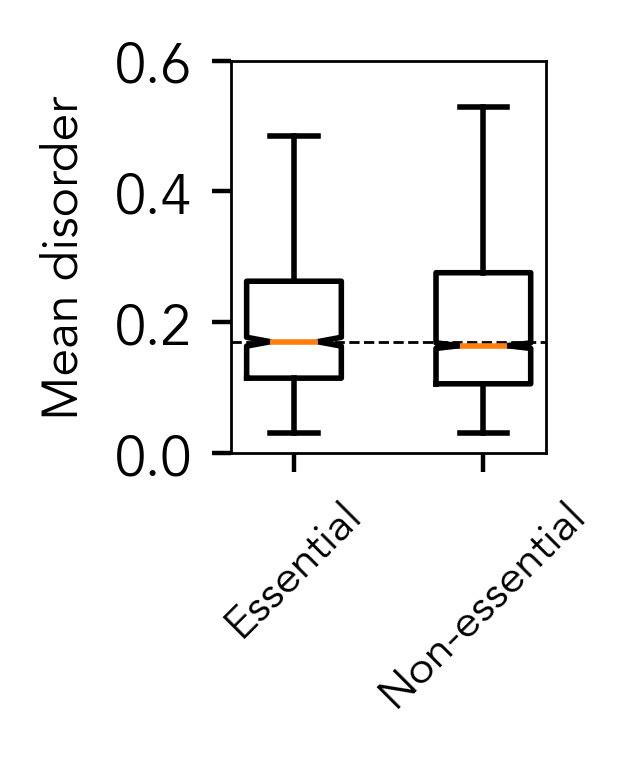

In [31]:
figure(num=None, figsize=(1.6, 2), dpi=200, facecolor='w', edgecolor='k')
ax = plt.gca()

data = [mean_disorder_essential, mean_disorder_non_essential]

ax.boxplot(data, showfliers=False, notch=True, meanline=True, positions=[1,1.3])
plt.plot([0.9,2.2],[np.median(mean_disorder_essential), np.median(mean_disorder_essential)],'--k',linewidth=0.5)
plt.xticks([1,1.3],['Essential','Non-essential'], fontsize=8, rotation=45)
plt.ylabel('Mean disorder',fontsize=9)
plt.xlim([0.9,1.4])
plt.ylim([0,0.6])
plt.tight_layout()

plt.savefig('figures/disorder_essential_vs_nonessential.pdf')


stat, p = mannwhitneyu(mean_disorder_non_essential, mean_disorder_essential, alternative='two-sided')
print(f"Comparing {len(mean_disorder_essential)} essential genes vs. {len(mean_disorder_non_essential)} non-essential genes")

print(f"Mann–Whitney U statistic: {stat}")
print(f"p-value: {p}")

if p > 0.05:
    print("Interpretation: No significant evidence that the two groups differ in their distributions of mean disorder.")
    

    

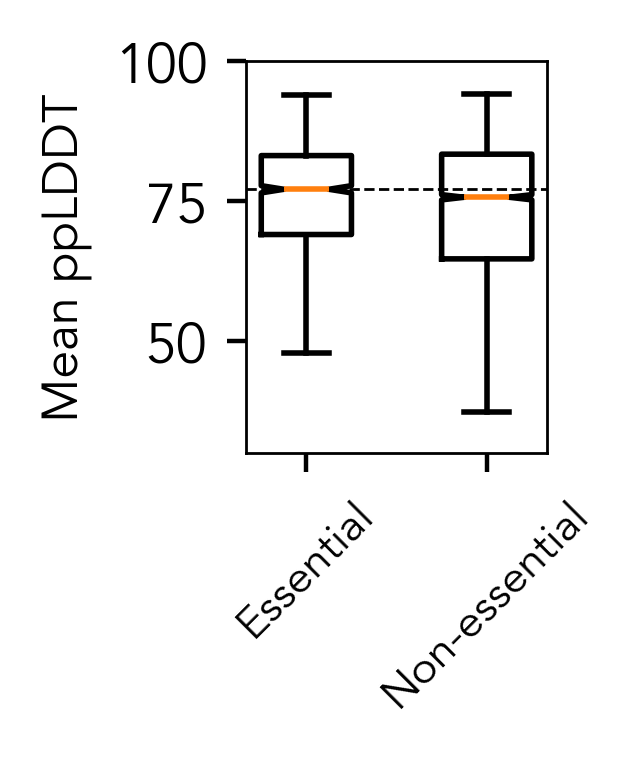

In [14]:
figure(num=None, figsize=(1.6, 2), dpi=200, facecolor='w', edgecolor='k')
ax = plt.gca()

data = [mean_pLDDT_essential, mean_pLDDT_non_essential]

ax.boxplot(data, showfliers=False, notch=True, meanline=True, positions=[1,1.3])
plt.plot([0.9,2.2],[np.median(mean_pLDDT_essential), np.median(mean_pLDDT_essential)],'--k',linewidth=0.5)
plt.xticks([1,1.3],['Essential','Non-essential'], fontsize=8, rotation=45)
plt.ylabel('Mean ppLDDT',fontsize=9)
plt.xlim([0.9,1.4])
plt.ylim([30,100])
plt.tight_layout()

plt.savefig('figures/ppLDDT_essential_vs_nonessential.pdf')



0.6385430393773142
0.5852744186046511


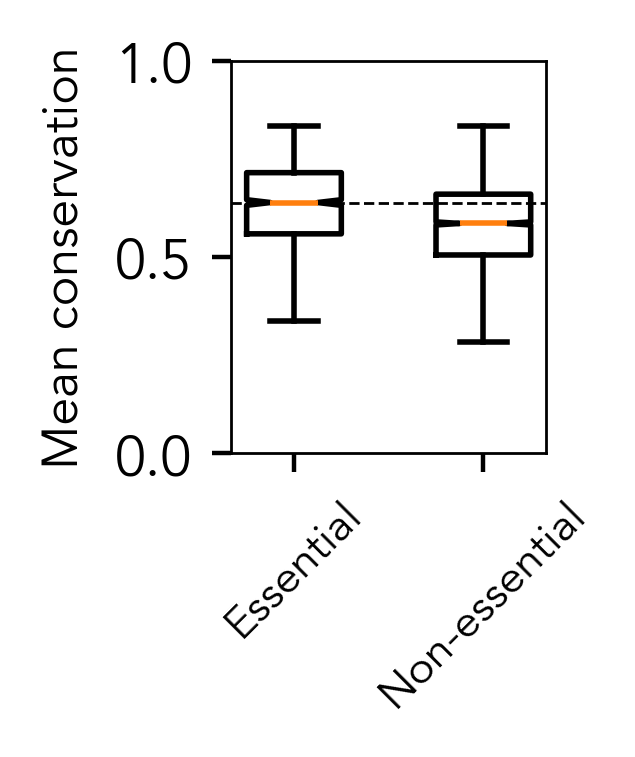

In [15]:
figure(num=None, figsize=(1.6, 2), dpi=200, facecolor='w', edgecolor='k')
ax = plt.gca()

data = [mean_conservation_essential, mean_conservation_non_essential]

print(np.median(mean_conservation_essential))
print(np.median(mean_conservation_non_essential))

ax.boxplot(data, showfliers=False, notch=True, meanline=True, positions=[1,1.3])
plt.plot([0.9,2.2],[np.median(mean_conservation_essential), np.median(mean_conservation_essential)],'--k',linewidth=0.5)
plt.xticks([1,1.3],['Essential','Non-essential'], fontsize=8, rotation=45)
plt.ylabel('Mean conservation',fontsize=9)
plt.xlim([0.9,1.4])
plt.ylim([0,1])
plt.tight_layout()

plt.savefig('figures/conservation_essential_vs_nonessential.pdf')

